Por fazer ainda: -
mlp, analysis, casas avaliacao, rbf? lstm? renda?



### Get the data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import os
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt

In [38]:
df_dados = pd.read_json('../../regioes/DataSite/dadosFinais.json')
locationD = pd.read_json('../../regioes/DataSite/localizacao.json', typ='series')
locationD_inverted = {v: k for k, v in locationD.items()}
# locationD_int_keys = {k: v for k, v in locationD.items()}

houseData = pd.read_json('../../regioes/DataSite/housesData.json')
houseData = pd.json_normalize(houseData['houses'])
serietempAno = pd.read_json('../../regioes/DataSite/seriesTempAno.json')

paths = pd.read_json('../../regioes/DataSite/region_paths.json', typ='series') # paths['Cascais']
# locationD_int_keys
df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d', errors='coerce')
df_dados = df_dados.sort_values(by=['Data', 'codLocation'])
df_dados.Date.head()

248    2023-01-01
579    2023-01-01
903    2023-01-01
1234   2023-01-01
1565   2023-01-01
Name: Date, dtype: datetime64[ns]

In [39]:
# df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d', errors='coerce')
df_dados = df_dados.sort_values(by=['Data', 'codLocation'])

# # Selecionando as colunas de interesse para a análise
# columns_of_interest = [
#     'Date', 'Preço médio_sell', 'Preço médio por m2_sell',
#     'Preço médio_rent', 'Preço médio por m2_rent', 'price_to_rent_ratio', 'codLocation'
# ]
df_dados['codLocation'] = df_dados['codLocation'].astype(str)
df_dados['localizacao'] = df_dados['codLocation'].map(locationD)
unique_locations = df_dados['localizacao'].unique()
# unique_locations
df_dados.head(20)

df_dados.columns

Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
       'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano', '1 mês (Euribor)',
       '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos parti

### Dasboard

In [40]:
serietempAno.head()
# ['Edifícios concluídos por localização (N)', 
# 'Apartamentos concluídos (N)', 'Apartamentos licenciados (N)', 
# 'Contratos de compra e venda (N) por localização', 
# 'Transações (N.º) de alojamentos', 'Remuneração média mensal (€) por trabalhador'
# 'Ganho médio mensal (€) por região', 'Densidade populacional (N.º/km²)', 'Índice de preços da habitação']


,Tempo,Localizacao,Superfície habitável média das divisões (m²),Moradias concluídas (N),Edifícios concluídos por localização (N),Apartamentos concluídos (N),Habitação familiar clássica (N),Proporção de superfície reconstruída (%),Reconstruções por 100 novas construções concluidas (N),Superfície total de obras concluídas (m²),...,Reconstruções por 100 novas construções licenciadas (N),Apartamentos licenciados (N),Valor médio dos prédios transacionados (€/ N.º),Edifícios licenciados por localização (N),Contratos de mútuo com hipoteca (€) por localização,Saldo migratório (N.º),População média anual residente (N),Contratos de mútuo com hipoteca (N.º) por localização,Divisões por fogo licenciado em novas construções (N),Moradias licenciadas (N)
0,2000,Continente,NaN,NaN,57216.0,NaN,NaN,0.05,7.4,24769299.0,...,7.1,NaN,53935.0,60072.0,19234085.0,66568.0,9805338.5,214204.0,4.8,NaN
1,2001,Continente,NaN,NaN,59225.0,NaN,3022087.0,0.12,7.5,26318911.0,...,7.6,NaN,56466.0,59148.0,20836886.0,52199.0,9874675.0,214183.0,4.8,NaN
2,2002,Continente,18.6,NaN,61893.0,NaN,3071304.0,0.56,5.5,29752464.0,...,5.6,NaN,61311.0,58430.0,23256034.0,38655.0,9927082.0,239848.0,4.9,NaN
3,2003,Continente,18.9,NaN,56018.0,NaN,3119432.0,1.15,5.4,25014674.0,...,5.9,NaN,69717.0,53220.0,24694767.0,22245.0,9962630.0,230166.0,4.9,NaN
4,2004,Continente,19.5,27027.0,46917.0,3896.0,3155555.0,1.00,5.1,20024413.0,...,4.7,5287.0,84614.0,49372.0,26338147.0,12298.0,9984537.0,234258.0,4.8,26144.0


In [41]:
import pandas as pd

# Indicadores em português
columns = [
    'Edifícios concluídos por localização (N)', 
    'Apartamentos concluídos (N)', 
    'Apartamentos licenciados (N)', 
    'Contratos de compra e venda (N) por localização', 
    'Transações (N.º) de alojamentos', 
    'Ganho médio mensal (€) por região', 
    'Densidade populacional (N.º/km²)', 
    'Índice de preços da habitação'
]

last_non_nan_values_with_date = {}

for col in columns:
    if col in serietempAno.columns:  # Verifica se a coluna existe no DataFrame
        # Pegar o índice do último valor não-nulo
        last_valid_index = serietempAno[col].dropna().index[-1]
        last_value = serietempAno[col].dropna().iloc[-1]  # Último valor não-nulo
        previous_value = serietempAno[col].dropna().iloc[-2]  # Valor anterior ao último
        associated_date = serietempAno.loc[last_valid_index, 'Tempo']  # Data associada ao último valor
        
        # Calcular a variação percentual em relação ao valor do ano anterior
        percentage_change = ((last_value - previous_value) / previous_value) * 100

        # Adicionar ao dicionário
        last_non_nan_values_with_date[col] = {
            'Value': last_value, 
            'Date': associated_date,
            'previous_value': previous_value, 
            'Percentage Change': percentage_change
        }

# Criar DataFrame a partir do dicionário
df_last_values = pd.DataFrame(last_non_nan_values_with_date)

# Renomear colunas para inglês
df_last_values = df_last_values.rename(columns={
    'Edifícios concluídos por localização (N)': 'Buildings completed (N)',
    'Apartamentos concluídos (N)': 'Apartments completed (N)',
    'Apartamentos licenciados (N)': 'Licensed apartments (N)',
    'Contratos de compra e venda (N) por localização': 'Purchase/sale contracts (N)',
    'Transações (N.º) de alojamentos': 'Housing transactions (N)',
    'Ganho médio mensal (€) por região': 'Avg. monthly earnings (€)',
    'Densidade populacional (N.º/km²)': 'Population density (N/km²)',
    'Índice de preços da habitação': 'Housing price index'
})

# Transpor o DataFrame e exibir as primeiras 20 linhas
df_last_values = df_last_values.T.head(20)

df_last_values

,Value,Date,previous_value,Percentage Change
Buildings completed (N),15099.00,2022.0,15694.00,-3.791258
Apartments completed (N),1335.00,2022.0,1180.00,13.135593
Licensed apartments (N),1592.00,2022.0,1540.00,3.376623
Purchase/sale contracts (N),220156.00,2019.0,231288.00,-4.813047
Housing transactions (N),130815.00,2023.0,160812.00,-18.653459
Avg. monthly earnings (€),1294.10,2021.0,1250.80,3.461784
Population density (N/km²),112.50,2022.0,111.40,0.987433
Housing price index,212.45,2024.0,198.55,7.000755


In [42]:
# if not os.path.exists('./Dados'):
#     os.makedirs('./Dados')

# df_last_values.to_json('./Dados/last_values.json', orient='index')

In [43]:
# table
df_dados.columns
# 'localizacao','Preço médio_sell', 'Preço médio por m2_sell', 'Propriedades vendida e retiradas_sell', 
# 'Preço médio_rent', 'Preço médio por m2_rent', 'Propriedades vendida e retiradas_rent', 'price_to_rent_ratio', 
# market value, '1 year perfomace, 'yeild portencail

Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
       'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano', '1 mês (Euribor)',
       '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos parti

In [44]:
selected_columns = [
    'localizacao', 'Preço médio_sell', 'Preço médio por m2_sell', 'Propriedades vendida e retiradas_sell',
    'Preço médio_rent', 'Preço médio por m2_rent', 'Propriedades vendida e retiradas_rent', 
    'price_to_rent_ratio', 'Date'
]

# df_dados['Date'] = pd.to_datetime(df_dados['Date'])

most_recent_date = df_dados['Date'].max()
selected_data = df_dados[df_dados['Date'] == most_recent_date][selected_columns]

grouped_data = selected_data.groupby('localizacao').first().reset_index()

grouped_data = grouped_data.rename(columns={
    'localizacao': 'Location',
    'Preço médio_sell': 'AVG Price (Sell)',
    'Preço médio por m2_sell': 'AVG Price per m² (Sell)',
    'Propriedades vendida e retiradas_sell': 'Properties Sold (Sell)',
    'Preço médio_rent': 'AVG Price (Rent)',
    'Preço médio por m2_rent': 'AVG Price per m² (Rent)',
    'Propriedades vendida e retiradas_rent': 'Properties Sold (Rent)',
    'price_to_rent_ratio': 'Price-to-Rent Ratio'
})

grouped_data['Market Value'] = grouped_data['AVG Price (Sell)'] * grouped_data['Properties Sold (Sell)']

first_records = df_dados.sort_values('Date').groupby('localizacao').first()[['Date', 'Preço médio_sell']].rename(columns={'Preço médio_sell': 'First Price', 'Date': 'First Date'})

last_records = df_dados.sort_values('Date').groupby('localizacao').last()[['Date', 'Preço médio_sell']].rename(columns={'Preço médio_sell': 'Last Price', 'Date': 'Last Date'})

grouped_data = grouped_data.merge(first_records, left_on='Location', right_index=True)
grouped_data = grouped_data.merge(last_records, left_on='Location', right_index=True)

grouped_data['Year Difference'] = (grouped_data['Last Date'] - grouped_data['First Date']).dt.days / 365.25

grouped_data['1 Year Performance'] = ((grouped_data['Last Price'] - grouped_data['First Price']) / grouped_data['First Price']) / grouped_data['Year Difference'] * 100

grouped_data['Potential Yield'] = (grouped_data['AVG Price (Rent)'] * 12) / grouped_data['AVG Price (Sell)'] * 100

grouped_data = grouped_data.drop(columns=['First Date', 'Last Date', 'First Price', 'Last Price', 'Date', 'Year Difference'])


int_columns = ['AVG Price (Sell)', 'AVG Price per m² (Sell)', 'Properties Sold (Sell)', 
               'AVG Price (Rent)', 'AVG Price per m² (Rent)', 'Properties Sold (Rent)', 'Market Value', 'Price-to-Rent Ratio']

grouped_data[int_columns] = grouped_data[int_columns].astype(int)

# Format '1 Year Performance' and 'Potential Yield' to two decimal places with a percentage sign
grouped_data['1 Year Performance'] = grouped_data['1 Year Performance'].map(lambda x: f"{x:.2f}%")
grouped_data['Potential Yield'] = grouped_data['Potential Yield'].map(lambda x: f"{x:.2f}%")


def format_value(num):
    if num >= 1_000_000_000:
        return f"{num / 1_000_000_000:.2f}B"
    elif num >= 1_000_000:
        return f"{num / 1_000_000:.2f}M"
    elif num >= 1_000:
        return f"{num / 1_000:.2f}K"
    else:
        return str(num)

# Apply the formatting function to the 'Market Value' column
grouped_data['Market Value'] = grouped_data['Market Value'].apply(format_value)

ComparativeTable = grouped_data.head(50)
ComparativeTable.head(50)

,Location,AVG Price (Sell),AVG Price per m² (Sell),Properties Sold (Sell),AVG Price (Rent),AVG Price per m² (Rent),Properties Sold (Rent),Price-to-Rent Ratio,Market Value,1 Year Performance,Potential Yield
0,Amadora,236243,2722,75,1242,16,44,190,17.72M,11.83%,6.31%
1,Cascais,877540,5752,59,2567,23,84,341,51.77M,9.57%,3.51%
2,Loures,333818,2984,49,1561,17,30,213,16.36M,9.09%,5.61%
3,Odivelas,322013,2930,37,1346,15,35,239,11.91M,8.27%,5.02%
4,Oeiras,459385,3837,50,1664,17,70,276,22.97M,3.59%,4.35%
5,Sintra,237107,2402,138,1332,15,45,178,32.72M,8.07%,6.74%


In [45]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


affordability_factors = ['AVG Price (Sell)', 'Price-to-Rent Ratio', 'AVG Price per m² (Sell)']

scaler = MinMaxScaler(feature_range=(0.01, 0.99))
grouped_data[affordability_factors] = scaler.fit_transform(grouped_data[affordability_factors])

grouped_data['Affordability Score'] = grouped_data[affordability_factors].mean(axis=1)
grouped_data['Affordability Rank'] = grouped_data['Affordability Score'].rank(method='min')
Affordability = grouped_data[['Location', 'Affordability Score', 'Affordability Rank']]

Affordability_data = Affordability.head(50)
Affordability_data

,Location,Affordability Score,Affordability Rank
0,Amadora,0.065253,2.0
1,Cascais,0.990000,6.0
2,Loures,0.186599,3.0
3,Odivelas,0.227426,4.0
4,Oeiras,0.459996,5.0
5,Sintra,0.010440,1.0


In [46]:
profitability_factors = ['Potential Yield', '1 Year Performance']

grouped_data['Potential Yield'] = grouped_data['Potential Yield'].str.rstrip('%').astype(float)
grouped_data['1 Year Performance'] = grouped_data['1 Year Performance'].str.rstrip('%').astype(float)

scaler = MinMaxScaler()
grouped_data[profitability_factors] = scaler.fit_transform(grouped_data[profitability_factors])

grouped_data['Profitability Score'] = grouped_data[profitability_factors].mean(axis=1)
grouped_data['Profitability Rank'] = grouped_data['Profitability Score'].rank(ascending=False, method='min')
profitable_cities = grouped_data[['Location', 'Profitability Score', 'Profitability Rank']].sort_values(by='Profitability Rank')


profitable_cities_data = profitable_cities.head(7)
profitable_cities_data

,Location,Profitability Score,Profitability Rank
0,Amadora,0.933437,1.0
5,Sintra,0.771845,2.0
2,Loures,0.658815,3.0
3,Odivelas,0.517727,4.0
1,Cascais,0.362864,5.0
4,Oeiras,0.130031,6.0


### Market Analysis

##### Key indicatores

In [24]:
df_dados.columns

Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
       'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano', '1 mês (Euribor)',
       '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos parti

In [47]:
# Ensure the 'Date' column is converted to datetime format
df_dados['Date'] = pd.to_datetime(df_dados['Date'])

# Set 'Date' as the index
df_dados.set_index('Date', inplace=True)

# Define required columns and numeric columns
required_columns = [
    'Preço médio_sell',
    'Novas propriedades únicas_sell',
    'Propriedades vendida e retiradas_sell',
    'Preço médio_rent',
    'Novas propriedades únicas_rent',
    'Propriedades vendida e retiradas_rent',
    'Date',
    'Location'  # Adding Location for grouping
]

numeric_columns = [col for col in required_columns if col not in ['Date', 'Location']]

# Group by 'localizacao'
grouped = df_dados.groupby('localizacao')

# Loop through each location
dashboard_results = []
for location, data in grouped:
    most_recent_date = data.index.max()  # Get the most recent date
    one_year_ago = most_recent_date - pd.DateOffset(years=1)  # Calculate one year ago
    
    # Get the data for the most recent date and one year ago
    most_recent_data = data.loc[most_recent_date]
    one_year_ago_data = data[data.index <= one_year_ago].iloc[-1]
    
    # Calculate percentage change for numeric columns
    percentage_changes = ((most_recent_data[numeric_columns] - one_year_ago_data[numeric_columns]) / one_year_ago_data[numeric_columns]) * 100
    
    # Create a dictionary for each location containing the most recent values and percentage changes
    location_data = {
        'location': location,
        'most_recent_values': most_recent_data[numeric_columns].to_dict(),
        'percentage_changes': percentage_changes.round(2).to_dict()
    }
    
    dashboard_results.append(location_data)

# Convert the dashboard results to a DataFrame for easy display or to use in your dashboard
# dashboard_df = pd.DataFrame(dashboard_results)
dashboard_by_location = {
    entry['location']: {
        key: {
            'most_recent_values': entry['most_recent_values'][key],
            'percentage_changes': round(entry['percentage_changes'][key], 2)
        }
        for key in entry['most_recent_values']
    }
    for entry in dashboard_results
    if entry['location'].lower() == 'amadora'  # Filtrando apenas pela localização "amadora"
}

dashboard_by_location



{'Amadora': {'Preço médio_sell': {'most_recent_values': 236243.0,
   'percentage_changes': 25.56},
  'Novas propriedades únicas_sell': {'most_recent_values': 60.0,
   'percentage_changes': 20.0},
  'Propriedades vendida e retiradas_sell': {'most_recent_values': 75.0,
   'percentage_changes': -5.06},
  'Preço médio_rent': {'most_recent_values': 1242.0,
   'percentage_changes': 70.37},
  'Novas propriedades únicas_rent': {'most_recent_values': 26.0,
   'percentage_changes': 116.67},
  'Propriedades vendida e retiradas_rent': {'most_recent_values': 44.0,
   'percentage_changes': 193.33}}}

In [48]:
# # Assuming there's a 'Location' column in your dataframe for grouping
# required_columns = [
#     'Preço médio_sell',
#     'Novas propriedades únicas_sell',
#     'Propriedades vendida e retiradas_sell',
#     'Preço médio_rent',
#     'Novas propriedades únicas_rent',
#     'Propriedades vendida e retiradas_rent',
#     'Date',
#     'Location'  # Adding Location for grouping
# ]

# # Define the numeric columns excluding 'Date' and 'Location'
# numeric_columns = [col for col in required_columns if col not in ['Date', 'Location']]

# # Convert the 'Date' column to datetime format
# # df_dados['Date'] = pd.to_datetime(df_dados['Date'])

# # Set the 'Date' column as the index
# df_dados.set_index('Date', inplace=True)

# # Group by 'Location' to perform calculations per location
# grouped = df_dados.groupby('localizacao')

# # Create an empty list to store results for each location
# results = []

# # Loop through each location group and calculate the percentage change
# for location, data in grouped:
#     most_recent_date = data.index.max()
#     one_year_ago = most_recent_date - pd.DateOffset(years=1)
    
#     # Get the data closest to one year ago and the most recent data
#     one_year_ago_data = data[data.index <= one_year_ago].iloc[-1]
#     most_recent_data = data.iloc[-1]
    
#     percentage_changes = ((most_recent_data[numeric_columns] - one_year_ago_data[numeric_columns]) / one_year_ago_data[numeric_columns]) * 100
    
#     result_df = pd.DataFrame({
#         'Location': location,
#         'Most Recent Values': most_recent_data[numeric_columns],
#         'Values One Year Ago': one_year_ago_data[numeric_columns],
#         'Percentage Change': percentage_changes.round(2)
#     })

#     results.append(result_df)

# final_results = pd.concat(results)

# final_results

In [49]:
# required_columns = [
#     # 'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
#     # 'Avaliacoes Total',
#     'Preço médio_sell',
#     'Novas propriedades únicas_sell',
#     'Propriedades vendida e retiradas_sell',
#     'Preço médio_rent',
#     'Novas propriedades únicas_rent',
#     'Propriedades vendida e retiradas_rent',
#     'Date'

# ]
# numeric_columns = [col for col in required_columns if col != 'Date']


# df_dados['Date'] = pd.to_datetime(df_dados['Date'])
# df_dados.set_index('Date', inplace=True)
# most_recent_date = df_dados.index.max()
# one_year_ago = most_recent_date - pd.DateOffset(years=1)

# one_year_ago_data = df_dados[df_dados.index <= one_year_ago].iloc[-1]
# most_recent_data = df_dados.iloc[-1]
# percentage_changes = ((most_recent_data[numeric_columns] - one_year_ago_data[numeric_columns]) / one_year_ago_data[numeric_columns]) * 100

# result_df = pd.DataFrame({
#     'Most Recent Values': most_recent_data[numeric_columns],
#     'Values One Year Ago': one_year_ago_data[numeric_columns],
#     'Percentage Change': percentage_changes.round(2)
# })







In [50]:
# result_df['Percentage Change'] = result_df['Percentage Change'].round(2)
# result_df

In [51]:
# indicadores do mercado?
# df_dados

# df_dados.columns
# # População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2), 
# # Avaliacoes Total, 'Preço médio_sell, 'Novas propriedades únicas_sell',, 
# # 'Propriedades vendida e retiradas_sell', 'Preço médio_rent'

# required_columns = [
#     # 'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
#     # 'Avaliacoes Total',
#     'Preço médio_sell',
#     'Novas propriedades únicas_sell',
#     'Propriedades vendida e retiradas_sell',
#     'Preço médio_rent',
#     'Novas propriedades únicas_rent',
#     'Propriedades vendida e retiradas_rent',
#     'Date'

# ]

# # Assuming df_dados is the dataframe, we will get the most recent data for these columns.
# most_recent_values = df_dados[required_columns].dropna().head(1)
# most_recent_values.to_dict(orient='records')


##### Sell and Rent over time

In [52]:
df_dados = pd.read_json('../../regioes/DataSite/dadosFinais.json')

df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d', errors='coerce')
df_dados = df_dados.sort_values(by=['Data', 'codLocation'])
df_dados['codLocation'] = df_dados['codLocation'].astype(str)
df_dados['localizacao'] = df_dados['codLocation'].map(locationD)
df_dados[['Date', 'codLocation', 'Preço médio_sell', 'Preço médio_rent', 'localizacao']]


columns_to_include = {
    'Date': 'data',
    'Preço médio_sell': 'preco_medio_venda',
    'Preço médio_rent': 'preco_medio_aluguel'
}


SellAndRentOverTime = {
    location: [
        {
            'data': row['Date'].strftime('%Y-%m-%d'), 
            'preco_medio_venda': row['Preço médio_sell'],
            'preco_medio_aluguel': row['Preço médio_rent']
        }
        for _, row in df_dados[df_dados['localizacao'] == location][list(columns_to_include.keys())].iterrows()
    ]
    for location in df_dados['localizacao'].unique()
}

SellAndRentOverTime

{'Cascais': [{'data': '2023-01-01',
   'preco_medio_venda': 781410.0,
   'preco_medio_aluguel': 2192.0},
  {'data': '2020-03-01',
   'preco_medio_venda': 569898.0,
   'preco_medio_aluguel': 1810.0},
  {'data': '2018-04-01',
   'preco_medio_venda': 546758.0,
   'preco_medio_aluguel': 2298.0},
  {'data': '2022-05-01',
   'preco_medio_venda': 741719.0,
   'preco_medio_aluguel': 1740.0},
  {'data': '2018-07-01',
   'preco_medio_venda': 525547.0,
   'preco_medio_aluguel': 2242.0},
  {'data': '2021-08-01',
   'preco_medio_venda': 639608.0,
   'preco_medio_aluguel': 1689.0},
  {'data': '2019-09-01',
   'preco_medio_venda': 548382.0,
   'preco_medio_aluguel': 1921.0},
  {'data': '2023-10-01',
   'preco_medio_venda': 797631.0,
   'preco_medio_aluguel': 2460.0},
  {'data': '2020-11-01',
   'preco_medio_venda': 561774.0,
   'preco_medio_aluguel': 1657.0},
  {'data': '2019-12-01',
   'preco_medio_venda': 561131.0,
   'preco_medio_aluguel': 1864.0},
  {'data': '2022-01-02',
   'preco_medio_venda': 

##### graficos

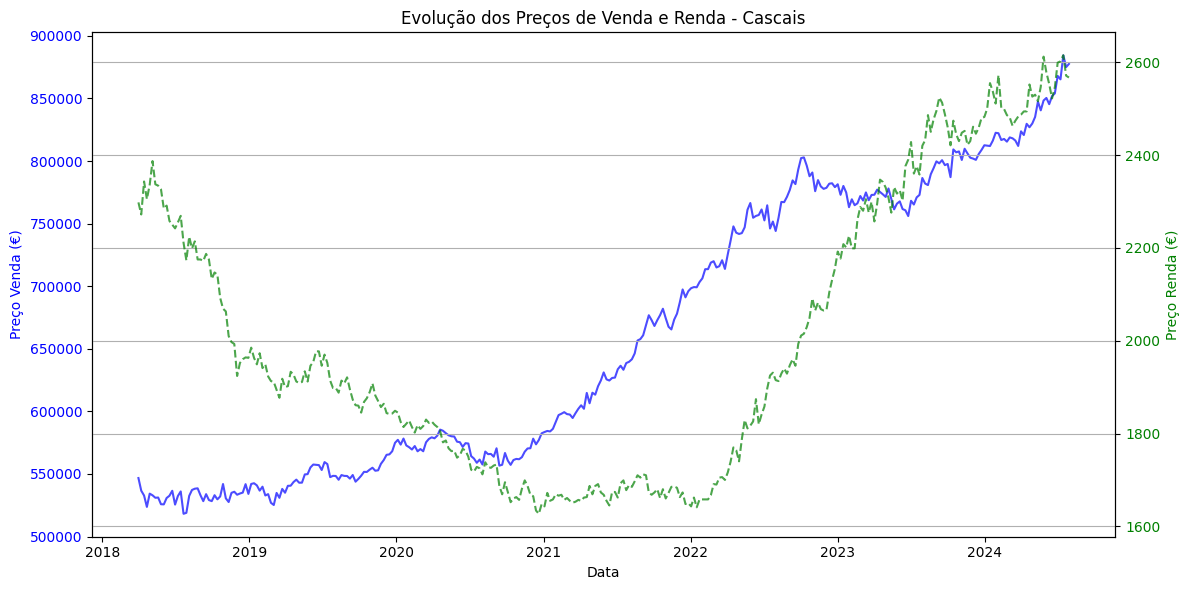

,Date,codLocation,Preço médio_sell,Preço médio_rent,localizacao
0,2018-04-01,1711105,546758.0,2298.0,Cascais
1,2018-04-08,1711105,536637.0,2272.0,Cascais
2,2018-04-15,1711105,532787.0,2343.0,Cascais
3,2018-04-22,1711105,523698.0,2305.0,Cascais
4,2018-04-29,1711105,534281.0,2336.0,Cascais


In [53]:
import matplotlib.pyplot as plt

# Supondo que 'location' é a localização que você quer visualizar
location = 'Cascais'  # 'Cascais', 'Loures', 'Oeiras', 'Sintra', 'Amadora', 'Odivelas'


location_price_data = df_dados[['Date', 'codLocation', 'Preço médio_sell', 'Preço médio_rent', 'localizacao']].dropna()
location_price_data = location_price_data.sort_values(by=['Date', 'localizacao'])
location_data = location_price_data[location_price_data['localizacao'] == location]


fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(location_data['Date'], location_data['Preço médio_sell'], color='b', label='Venda', alpha=0.7)
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço Venda (€)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
# plt.grid(True)

ax2 = ax1.twinx()
ax2.plot(location_data['Date'], location_data['Preço médio_rent'], color='g', label='Renda', linestyle='dashed', alpha=0.7)
ax2.set_ylabel('Preço Renda (€)', color='g')
ax2.tick_params(axis='y', labelcolor='g')


plt.title(f'Evolução dos Preços de Venda e Renda - {location}')
fig.tight_layout()
plt.grid(True)
plt.show()
location_data.head()


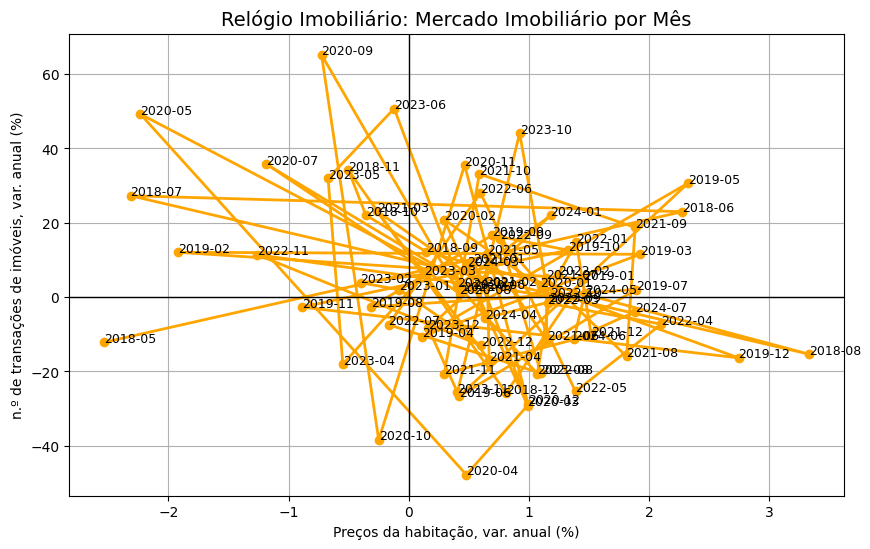

,Month,Preço médio_sell,Propriedades vendida e retiradas_sell,Price Change (%),Transaction Change (%)
1,2018-05,264139.043478,21.413043,-2.535806,-12.181640
2,2018-06,270157.541667,26.333333,2.278534,22.978003
3,2018-07,263901.965517,33.517241,-2.315529,27.280663
4,2018-08,272689.875000,28.375000,3.329990,-15.342078
5,2018-09,273087.766667,31.833333,0.145914,12.187959


In [54]:

location = 'Cascais'  # 'Cascais', 'Loures', 'Oeiras', 'Sintra', 'Amadora', 'Odivelas'


import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataset is loaded as df_dados, let's adjust the code to aggregate by month
# Also, plot the market phase trends based on the month

import matplotlib.pyplot as plt

# Convert 'Date' to datetime if not already in that format
df_dados['Date'] = pd.to_datetime(df_dados['Date'], errors='coerce')

# Extract the month and year from the 'Date'
df_dados['Month'] = df_dados['Date'].dt.to_period('M')

# Group by month and calculate average price change and transaction change
# Assuming 'Preço médio_sell' as the price column and 'Propriedades vendida e retiradas_sell' as transaction column
df_monthly = df_dados.groupby('Month').agg({
    'Preço médio_sell': 'mean',
    'Propriedades vendida e retiradas_sell': 'mean'
}).reset_index()

# Calculate percentage change for price and transactions
df_monthly['Price Change (%)'] = df_monthly['Preço médio_sell'].pct_change() * 100
df_monthly['Transaction Change (%)'] = df_monthly['Propriedades vendida e retiradas_sell'].pct_change() * 100

# Drop NaN values
df_monthly = df_monthly.dropna()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the lines connecting the points in order of the months
plt.plot(df_monthly['Price Change (%)'], df_monthly['Transaction Change (%)'], marker='o', color='orange', linestyle='-', linewidth=2)

# Add labels for each month at the corresponding points
for i in range(len(df_monthly)):
    plt.text(df_monthly['Price Change (%)'].iloc[i], df_monthly['Transaction Change (%)'].iloc[i], str(df_monthly['Month'].iloc[i]), fontsize=9)

# Add titles and labels
plt.title('Relógio Imobiliário: Mercado Imobiliário por Mês', fontsize=14)
plt.xlabel('Preços da habitação, var. anual (%)')
plt.ylabel('n.º de transações de imóveis, var. anual (%)')

# Add grid lines
plt.grid(True)

# Optional: Add lines to divide the graph into four quadrants
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Show the plot
plt.show()

df_monthly.head()


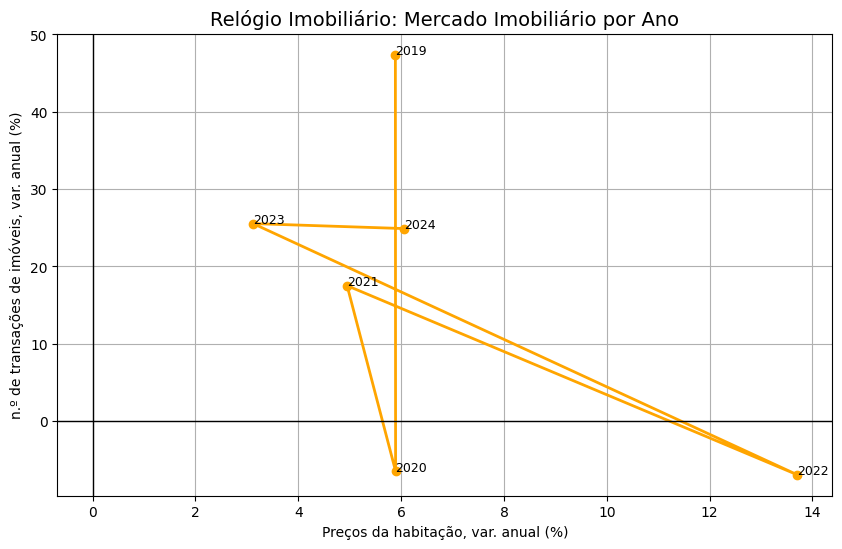

,Year,Preço médio_sell,Propriedades vendida e retiradas_sell,Price Change (%),Transaction Change (%)
1,2019,286061.225649,48.353896,5.888272,47.380768
2,2020,302917.061093,45.218650,5.892387,-6.483959
3,2021,317910.490385,53.134615,4.949681,17.505976
4,2022,361474.525641,49.442308,13.703239,-6.948969
5,2023,372753.704403,62.069182,3.120325,25.538603


In [55]:
# Since we want to plot by year, let's aggregate the data by year and replot the graph
# Assuming df_dados is loaded as the correct dataframe

# First, let's aggregate by year and create the new plot based on yearly data

# Extract the year from the 'Date' column
df_dados['Year'] = df_dados['Date'].dt.year

# Group by year and calculate the mean price change and transaction change for each year
df_yearly = df_dados.groupby('Year').agg({
    'Preço médio_sell': 'mean',
    'Propriedades vendida e retiradas_sell': 'mean'
}).reset_index()

# Calculate percentage change for price and transactions on a yearly basis
df_yearly['Price Change (%)'] = df_yearly['Preço médio_sell'].pct_change() * 100
df_yearly['Transaction Change (%)'] = df_yearly['Propriedades vendida e retiradas_sell'].pct_change() * 100

# Drop NaN values
df_yearly = df_yearly.dropna()

# Create the plot for yearly data
plt.figure(figsize=(10, 6))

# Plot the lines connecting the points in order of the years
plt.plot(df_yearly['Price Change (%)'], df_yearly['Transaction Change (%)'], marker='o', color='orange', linestyle='-', linewidth=2)

# Add labels for each year at the corresponding points
for i in range(len(df_yearly)):
    plt.text(df_yearly['Price Change (%)'].iloc[i], df_yearly['Transaction Change (%)'].iloc[i], str(df_yearly['Year'].iloc[i]), fontsize=9)

# Add titles and labels
plt.title('Relógio Imobiliário: Mercado Imobiliário por Ano', fontsize=14)
plt.xlabel('Preços da habitação, var. anual (%)')
plt.ylabel('n.º de transações de imóveis, var. anual (%)')

# Add grid lines
plt.grid(True)

# Optional: Add lines to divide the graph into four quadrants
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Show the plot
plt.show()

df_yearly.head()


<Figure size 1000x600 with 0 Axes>

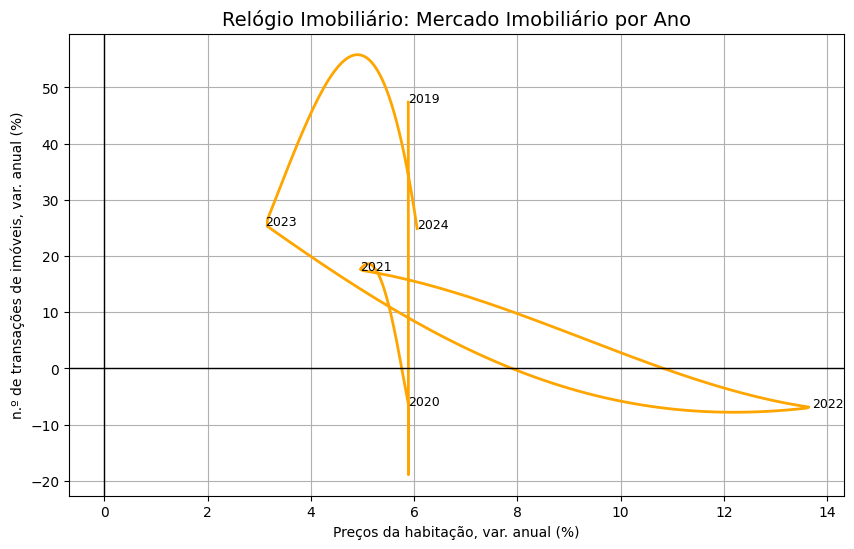

In [56]:
from scipy.interpolate import make_interp_spline
import numpy as np


df_dados['Year'] = df_dados['Date'].dt.year

# Group by year and calculate the mean price change and transaction change for each year
df_yearly = df_dados.groupby('Year').agg({
    'Preço médio_sell': 'mean',
    'Propriedades vendida e retiradas_sell': 'mean'
}).reset_index()

# Calculate percentage change for price and transactions on a yearly basis
df_yearly['Price Change (%)'] = df_yearly['Preço médio_sell'].pct_change() * 100
df_yearly['Transaction Change (%)'] = df_yearly['Propriedades vendida e retiradas_sell'].pct_change() * 100

# Drop NaN values
df_yearly = df_yearly.dropna()

# Create the plot for yearly data with smoother lines
plt.figure(figsize=(10, 6))

# Define x and y from the original data
x = df_yearly['Price Change (%)']
y = df_yearly['Transaction Change (%)']

# Use linspace to create more points between the actual data points for smoothing
x_new = np.linspace(0, len(x) - 1, 300)  # 300 points for a smooth curve

# Use make_interp_spline for smoothing based on the index rather than x-values directly
spl = make_interp_spline(np.arange(len(x)), y, k=5)  # B-spline of degree 3 for smoothing
y_smooth = spl(x_new)

# Map x_new back to the original x (Price Change (%)) scale
x_mapped = np.interp(x_new, np.arange(len(x)), x)

# Create the plot for the yearly data with smoother lines
plt.figure(figsize=(10, 6))

# Plot the smoothed curve
plt.plot(x_mapped, y_smooth, color='orange', linewidth=2)

# Add labels for each year at the corresponding points (using original data)
for i in range(len(df_yearly)):
    plt.text(df_yearly['Price Change (%)'].iloc[i], df_yearly['Transaction Change (%)'].iloc[i], str(df_yearly['Year'].iloc[i]), fontsize=9)

# Add titles and labels
plt.title('Relógio Imobiliário: Mercado Imobiliário por Ano', fontsize=14)
plt.xlabel('Preços da habitação, var. anual (%)')
plt.ylabel('n.º de transações de imóveis, var. anual (%)')

# Add grid lines
plt.grid(True)

# Optional: Add lines to divide the graph into four quadrants
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Show the plot
plt.show()

##### Market Dynamics

In [57]:
df_dados = pd.read_json('../../regioes/DataSite/dadosFinais.json')

df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d', errors='coerce')
df_dados = df_dados.sort_values(by=['Data', 'codLocation'])
df_dados['codLocation'] = df_dados['codLocation'].astype(str)
df_dados['localizacao'] = df_dados['codLocation'].map(locationD)


In [58]:
df_dados.head()
# df_dados['localizacao'].unique()

,Avaliacoes Total,Avaliacoes Apartamentos,Avaliacoes Moradias,Capital Divida Total,Capital Divida 3M,Capital Divida 6M,Capital Divida 12M,Juros Totais,Capital Amortizado,População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2),...,moving_avg_price_sell,exp_moving_avg_price_sell,price_to_rent_ratio,propriedades_unicas_rent,propriedades_unicas_sell,moving_avg_price_rent,exp_moving_avg_price_rent,moving_avg_Reducao_sell,moving_avg_Reducao_rent,localizacao
248,430,305,125.0,62356,126262,127634,125771,114,201,391.2,...,780915.333333,780833.000019,356.482664,4.0,-5.0,2159.333333,2161.802204,15.666667,6.666667,Cascais
579,489,403,86.0,62356,126262,127634,125771,114,201,391.2,...,316897.333333,316940.010083,267.311819,2.0,-9.0,1192.000000,1192.355605,11.000000,0.333333,Loures
903,350,305,45.0,62356,126262,127634,125771,114,201,391.2,...,447138.333333,447408.946052,299.476985,3.0,2.0,1522.000000,1516.558968,14.666667,0.000000,Oeiras
1234,1172,1014,158.0,62356,126262,127634,125771,114,201,391.2,...,200168.000000,200084.869136,157.493312,8.0,45.0,1275.333333,1270.812194,22.333333,0.666667,Sintra
1565,434,421,13.0,62356,126262,127634,125771,114,201,391.2,...,217517.333333,217336.921730,256.921615,11.0,3.0,843.333333,843.431244,13.000000,0.000000,Amadora


In [59]:
# #Market Dynamics

# df_dados.head()
# # mercado imobiliario: 
# # - Subida de preço_sell vs Redução de preço_sell
# # - Novas propriedades únicas_sell	vs Propriedades vendida e retiradas_sell

# renda:
# - 'Subida de preço_rent' vs 'Redução de preço_rent', 
# 'Novas propriedades únicas_rent' vs'Propriedades vendida e retiradas_rent',

# desnprego:
# - 'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) '
# - 'Número de beneficiários de subsídio de desemprego (milhares)-mensal'
# 'Desemprego registado no final do período-Total-Mensal',
    #    'Desemprego registado ao longo do período-Total-Mensal',

# taxas de juros:
# '1 mês (Euribor)',
#    '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)', 
# 'Taxa de juro implícita no crédito à habitação (TJH)'

# 'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
    #    'Endividamento dos particulares junto de empresas não financeiras'



# save all this columns ~
# columnsSelected = [
#     'Date', 'localizacao',
#     'Subida de preço_sell', 'Redução de preço_sell', 'Novas propriedades únicas_sell', 'Propriedades vendida e retiradas_sell',
#     'Subida de preço_rent', 'Redução de preço_rent', 'Novas propriedades únicas_rent', 'Propriedades vendida e retiradas_rent',
#     'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
#     # 'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
#     # 'Desemprego registado no final do período-Total-Mensal',
#     # 'Desemprego registado ao longo do período-Total-Mensal',
#     '1 mês (Euribor)', '3 meses (Euribor)', '6 meses (Euribor)', 
#     '12 meses (Euribor)', 
#     # 'Taxa de juro implícita no crédito à habitação (TJH)',
#     # 'Endividamento dos particulares-TVA', 
#     # 'Endividamento dos particulares', 'Endividamento dos particulares junto de empresas não financeiras'
# ]


# sort small names: short names
new_column_names = {
    'Date': 'date',
    'localizacao': 'location',
    'Avaliacoes Total': '# Total evaluations by the Bank',
    'Avaliacoes Apartamentos': '# Apartment evaluations by the Bank',
    'Avaliacoes Moradias': '# House evaluations',
    'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ': 'Unemployed Population (16-74)',
    'Prestacao Media': 'Avg. monthly payment',
    'Capital Amortizado': 'Amortized capital',
    'Juros Totais': 'Total interest',
    '1 mês (Euribor)': 'Euribor 1 month',
    '3 meses (Euribor)': 'Euribor 3 month',
    '6 meses (Euribor)': 'Euribor 6 month',
    '12 meses (Euribor)': 'Euribor 12 month',
    'Subida de preço_sell': 'Price increase in sell',
    'Redução de preço_sell': 'Price reduction in sell',
    'Novas propriedades únicas_sell': 'New unique properties in sell',
    'Propriedades vendida e retiradas_sell': 'Sold and removed properties in sell',
    'Subida de preço_rent': 'Price increase in rent',
    'Redução de preço_rent': 'Price reduction in rent',
    'Novas propriedades únicas_rent': 'New unique properties in rent',
    'Propriedades vendida e retiradas_rent': 'Sold and removed properties in rent',
    'price_to_rent_ratio': 'Price to rent ratio',
    'Número de beneficiários de subsídio de desemprego (milhares)-mensal': '# Unemployment benefit recipients (thousands)',
    'Desemprego registado no final do período-Total-Mensal': 'Registered unemployment',
    'Desemprego registado ao longo do período-Total-Mensal': 'Unemployment throughout the period',
}


columnsSelected = [
    'Date', 'localizacao',
    'Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
    'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
    'Prestacao Media', 'Capital Amortizado', 'Juros Totais',
    '1 mês (Euribor)', '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)',
    'Subida de preço_sell', 
    'Redução de preço_sell', 
    'Novas propriedades únicas_sell', 
    'Propriedades vendida e retiradas_sell',
    'Subida de preço_rent', 
    'Redução de preço_rent', 
    'Novas propriedades únicas_rent', 
    'Propriedades vendida e retiradas_rent',
    'price_to_rent_ratio',
    'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
    'Desemprego registado no final do período-Total-Mensal',
    'Desemprego registado ao longo do período-Total-Mensal',
    # 'Taxa de juro implícita no crédito à habitação (TJH)',
    # 'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
    # 'Endividamento dos particulares junto de empresas não financeiras',
    # 'Densidade populacional (N.º/km²)', 'Índice de preços da habitação'

]


# location = 'Cascais'  # 'Cascais', 'Loures', 'Oeiras', 'Sintra', 'Amadora', 'Odivelas'
MarketDinamics = df_dados[columnsSelected]
MarketDinamics_data = MarketDinamics.sort_values(by=['Date', 'localizacao'])

MarketDinamics_data.rename(columns=new_column_names, inplace=True)


MarketDinamics_data.columns

Index(['date', 'location', '# Total evaluations by the Bank',
       '# Apartment evaluations by the Bank', '# House evaluations',
       'Unemployed Population (16-74)', 'Avg. monthly payment',
       'Amortized capital', 'Total interest', 'Euribor 1 month',
       'Euribor 3 month', 'Euribor 6 month', 'Euribor 12 month',
       'Price increase in sell', 'Price reduction in sell',
       'New unique properties in sell', 'Sold and removed properties in sell',
       'Price increase in rent', 'Price reduction in rent',
       'New unique properties in rent', 'Sold and removed properties in rent',
       'Price to rent ratio', '# Unemployment benefit recipients (thousands)',
       'Registered unemployment', 'Unemployment throughout the period'],
      dtype='object')

In [60]:
def show_duplicates(df):
    duplicates_summary = {}
    
    for column in df.columns:
        # Count duplicate values for each column
        duplicate_count = df[column].duplicated().sum()
        duplicates_summary[column] = duplicate_count
    
    # Convert the dictionary to a DataFrame for easy reading
    duplicates_df = pd.DataFrame(list(duplicates_summary.items()), columns=['Column', 'Duplicate Count'])
    
    return duplicates_df

# Example: Show duplicate counts for MarketDinamics DataFrame
show_duplicates(MarketDinamics).head()

,Column,Duplicate Count
0,Date,1648
1,localizacao,1973
2,Avaliacoes Total,1684
3,Avaliacoes Apartamentos,1701
4,Avaliacoes Moradias,1784


In [61]:
# MarketDinamics['Date'] = pd.to_datetime(MarketDinamics['Date'])

# # Function to plot a specific column against 'Date'
# def plot_column(df, column_name):
#     plt.figure(figsize=(10, 6))
#     plt.plot(df['Date'], df[column_name], marker='o', linestyle='-', color='b')
#     plt.title(f'{column_name} over Time')
#     plt.xlabel('Date')
#     plt.ylabel(column_name)
#     plt.grid(True)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# MarketDinamics_Cascais = MarketDinamics[MarketDinamics['localizacao'] == 'Cascais']

# plot_column(MarketDinamics_Cascais, 'Redução de preço_sell')

In [62]:
MarketDinamics_data = {
    city: [
        {
            **{col: (row[col].strftime('%Y-%m-%d') if isinstance(row[col], pd.Timestamp) else row[col]) 
               for col in row.index}  # Convert Timestamps to 'YYYY-MM-DD'
        }
        for _, row in city_df.iterrows()
    ]
    for city, city_df in MarketDinamics_data.groupby('location')
}
MarketDinamics_data

{'Amadora': [{'date': '2018-04-01',
   'location': 'Amadora',
   '# Total evaluations by the Bank': 468,
   '# Apartment evaluations by the Bank': 446,
   '# House evaluations': 22.0,
   'Unemployed Population (16-74)': 371.2,
   'Avg. monthly payment': 240,
   'Amortized capital': 196,
   'Total interest': 44,
   'Euribor 1 month': -0.372,
   'Euribor 3 month': -0.328,
   'Euribor 6 month': -0.27,
   'Euribor 12 month': -0.19,
   'Price increase in sell': 0.0,
   'Price reduction in sell': 2.0,
   'New unique properties in sell': 7.0,
   'Sold and removed properties in sell': 10.0,
   'Price increase in rent': 0.0,
   'Price reduction in rent': 0.0,
   'New unique properties in rent': 0.0,
   'Sold and removed properties in rent': 0.0,
   'Price to rent ratio': 202.568215892054,
   '# Unemployment benefit recipients (thousands)': 189.7,
   'Registered unemployment': 376014,
   'Unemployment throughout the period': 39933},
  {'date': '2018-04-08',
   'location': 'Amadora',
   '# Total 

##### House Data - Real Estate Investment Analysis

In [63]:
# houseData.columns
df_dados = pd.read_json('../../regioes/DataSite/dadosFinais.json')
# df_dados.columns

df_dados['codLocation'] = df_dados['codLocation'].astype(str)
df_dados['localizacao'] = df_dados['codLocation'].map(locationD)
df_dados['Date'] = df_dados.apply(lambda row: f"{int(row['Yeari']):04d}{int(row['Monthi']):02d}{int(row['Dayi']):02d}", axis=1)

df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d', errors='coerce')


most_recent_per_location = df_dados.loc[df_dados.groupby('localizacao')['Date'].idxmax()]
most_recent_per_location.Date.head()

1647   2024-07-28
330    2024-07-28
661    2024-07-28
1978   2024-07-28
985    2024-07-28
Name: Date, dtype: datetime64[ns]

In [64]:
selected_columns = [
    'title', 'mainImage', 'bedrooms_value', 'bathrooms_value', 'area_value', 
    'price', 'sale-price-per-sqm_value', 'days-on-market_value', 
    'new-rental-yield_value', 'local', 'energy-rating-estate-page_value', "last-price-change_value", 
    'combined_features', 'label', 'sale-status_value', 'id', 'new-rental-yield-average-rent-price_value','construction-year_value'
]
features_columns = [col for col in houseData.columns if 'features' in col]
houseData['combined_features'] = houseData[features_columns].apply(lambda row: [item for item in row.dropna().tolist() if isinstance(item, str)], axis=1)

property_data = houseData[selected_columns]
property_data['path'] = property_data['local'].map(paths)
property_data['codlocation'] = property_data['local'].map(locationD_inverted)
property_data[['codlocation', 'local']].drop_duplicates().head(10)

C:\Users\ruben\AppData\Local\Temp\ipykernel_36828\3575795033.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_data['path'] = property_data['local'].map(paths)
C:\Users\ruben\AppData\Local\Temp\ipykernel_36828\3575795033.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_data['codlocation'] = property_data['local'].map(locationD_inverted)


,codlocation,local
0,1711115,Amadora
29,1711105,Cascais
87,1711107,Loures
149,1711116,Odivelas
193,1711110,Oeiras
224,1711111,Sintra


In [65]:
most_recent_per_location.Date.head()

1647   2024-07-28
330    2024-07-28
661    2024-07-28
1978   2024-07-28
985    2024-07-28
Name: Date, dtype: datetime64[ns]

In [66]:
property_data = property_data.rename(columns={'local': 'localizacao'})
property_data_market = property_data.merge(most_recent_per_location, on='localizacao', how='left')

In [67]:
property_data_market.head()

,title,mainImage,bedrooms_value,bathrooms_value,area_value,price,sale-price-per-sqm_value,days-on-market_value,new-rental-yield_value,localizacao,...,Date,moving_avg_price_sell,exp_moving_avg_price_sell,price_to_rent_ratio,propriedades_unicas_rent,propriedades_unicas_sell,moving_avg_price_rent,exp_moving_avg_price_rent,moving_avg_Reducao_sell,moving_avg_Reducao_rent
0,Apartamento para venda em rua Actor António Si...,https://img4.idealista.pt/blur/WEB_DETAIL_TOP/...,2.0,1.0,75 m2,155000,"€2,067",114,7%,Amadora,...,2024-07-28,236954.333333,236526.617159,190.211755,18.0,15.0,1249.333333,1244.245657,23.333333,14.333333
1,Apartamento para venda em Serra de Carnaxide -...,https://ireland.apollo.olxcdn.com:443/v1/files...,4.0,4.0,170 m2,734500,"€4,321",50,None,Amadora,...,2024-07-28,236954.333333,236526.617159,190.211755,18.0,15.0,1249.333333,1244.245657,23.333333,14.333333
2,Apartamento para venda em largo Eugénio dos Sa...,https://img4.idealista.pt/blur/WEB_DETAIL_TOP/...,1.0,1.0,40 m2,121000,"€3,025",2,6.5%,Amadora,...,2024-07-28,236954.333333,236526.617159,190.211755,18.0,15.0,1249.333333,1244.245657,23.333333,14.333333
3,Apartamento para venda em rua São João de Deus...,https://img4.idealista.pt/blur/WEB_DETAIL_TOP/...,2.0,1.0,55 m2,228000,"€4,145",30,4.6%,Amadora,...,2024-07-28,236954.333333,236526.617159,190.211755,18.0,15.0,1249.333333,1244.245657,23.333333,14.333333
4,Apartamento para venda em Damaia de Cima - Loc...,https://ireland.apollo.olxcdn.com:443/v1/files...,2.0,1.0,70 m2,215000,"€3,071",429+,None,Amadora,...,2024-07-28,236954.333333,236526.617159,190.211755,18.0,15.0,1249.333333,1244.245657,23.333333,14.333333


In [68]:
# houseData.head() mostra todos menos a lista de casas
# lista_Casas = houseData[selected_columns]

# selected_columns = [
#     'title', 'mainImage', 'bedrooms_value', 'bathrooms_value', 'area_value', 
#     'price', 'sale-price-per-sqm_value', 'days-on-market_value', 
#     'new-rental-yield_value', 'local', 'energy-rating-estate-page_value', "last-price-change_value",
#     'label','type', 'sale-status_value', 'id', 'new-rental-yield-average-rent-price_value', 'construction-year_value'
# ]

# renome = ['thumbnail', 'bedrooms_label', 'new-rental-yield_label', 
#           'bathrooms_label', 'area_label', 'sale-status_label', 
#           'sale-price-per-sqm_label','days-on-market_label',
#           'new-rental-yield-average-rent-price_label', 
#           'energy-rating-estate-page_label', 'features-andares intermédios', 'features-mobilado', 'features-usado',
#             'location', 'last-price-change_label', 'features-paisagem vista',
#             'features-arrecadação', 'features-garagem', 'features-novo',
#             'features-varanda', 'features-rés do chão', 'features-para remodelar',
#             'features-piso: 1', 'features-estacionamento', 'features-muito bom',
#             'features-elevador', 'features-sul', 'features-piso: 2',
#             'features-cidade vista', 'features-norte', 'features-oeste',
#             'features-este', 'features-jardim']
# all = selected_columns + renome

# houseData_without_list = houseData.drop(columns=all)

# # Show the head of the houseData without the selected columns
# houseData_without_list.head(30)

In [69]:
# join the two dataframes: property_data and most_recent_per_location
# property_data = property_data.rename(columns={'local': 'localizacao'})
# property_data['Localizacao'] = property_data['Localizacao'].str.capitalize()
# property_data['Localizacao'] = property_data['Localizacao'].str.replace(' ', '')

# most_recent_per_location['Localizacao'] = most_recent_per_location['Localizacao'].str.capitalize()
# most_recent_per_location['Localizacao'] = most_recent_per_location['Localizacao'].str.replace(' ', '')

# property_data_market = property_data.merge(most_recent_per_location, on='localizacao', how='left')
# property_data_market.head()

In [70]:
# Noa utilizar???

# selected_columns = [
#     'title', 'mainImage', 'bedrooms_value', 'bathrooms_value', 'area_value', 
#     'price', 'sale-price-per-sqm_value', 'days-on-market_value', 
#     'new-rental-yield_value', 'local', 'energy-rating-estate-page_value', "last-price-change_value", 
#     'combined_features', 'label', 'sale-status_value', 'id', 'new-rental-yield-average-rent-price_value'
# ]

# property_data = houseData[selected_columns]

# property_list = []
# for _, row in property_data.iterrows():
#     property_dict = {
#         'mainImage': row['mainImage'],
#         'Title': row['title'],
#         'local': row['local'],
#         '# Beds': row['bedrooms_value'],
#         '# Baths': row['bathrooms_value'],
#         'Sq.Ft. (m²)': row['area_value'],
#         'Price': row['price'],
#         'Price/m²': row['sale-price-per-sqm_value'],
#         'Days on Market': row['days-on-market_value'],
#         'Estimated ROI (%)': row['new-rental-yield_value'],
#         'Energy Rating': row['energy-rating-estate-page_value'],
#         'price Change': row['last-price-change_value'],
#         'Features': row['combined_features'],
#         'Status': row['sale-status_value'],
#         'ID': row['id'],
#         'Avg. Rent Price': row['new-rental-yield-average-rent-price_value']
        
#     }
#     property_list.append(property_dict)

# property_json = json.dumps(property_list, ensure_ascii=False, indent=4)

# print(property_json)

In [71]:
property_data_market['Date'].head()

0   2024-07-28
1   2024-07-28
2   2024-07-28
3   2024-07-28
4   2024-07-28
Name: Date, dtype: datetime64[ns]

In [72]:
property_data_market["construction-year_value"].fillna("-", inplace=True)

C:\Users\ruben\AppData\Local\Temp\ipykernel_36828\1492893843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  property_data_market["construction-year_value"].fillna("-", inplace=True)
C:\Users\ruben\AppData\Local\Temp\ipykernel_36828\1492893843.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  property_data_market["construction-year_value"].fillna(

In [73]:
property_data_market.to_csv(f'./Dados/property_data_market.csv', encoding='utf-8', index=False, sep=';')

In [74]:
property_data_market['Date']

0     2024-07-28
1     2024-07-28
2     2024-07-28
3     2024-07-28
4     2024-07-28
         ...    
341   2024-07-28
342   2024-07-28
343   2024-07-28
344   2024-07-28
345   2024-07-28
Name: Date, Length: 346, dtype: datetime64[ns]

### Save the data into a json

In [75]:
# Converte a coluna 'Date' para string no formato ISO (YYYY-MM-DD)
# location_data['Date'] = location_data['Date'].dt.strftime('%Y-%m-%d')
# df_yearly['Date'] = df_yearly['Date'].dt.strftime('%Y-%m-%d')
# MarketDinamics_data['Date'] = MarketDinamics_data['Date'].dt.strftime('%Y-%m-%d')
property_data_market['Date'] = property_data_market['Date'].dt.strftime('%Y-%m-%d')

# most_recent_keys = {
#     row['Location']: {
#         'Most Recent Values': row['Most Recent Values'],
#         'Values One Year Ago': row['Values One Year Ago'],
#         'Percentage Change': row['Percentage Change'].round(2)
#     } 
#     for index, row in final_results.iterrows()
# }


In [76]:
if not os.path.exists('./Dados'):
    os.makedirs('./Dados')

data = {
    'Dashboard': {
        'KeyIndicators': df_last_values.to_dict(orient='index'),
        'ComparativeTable': ComparativeTable.to_dict(orient='records'),
        'AffordabilityTable': Affordability_data.to_dict(orient='records'),
        'ProfitableCities': profitable_cities.to_dict(orient='records'),
    },
    'MarketAnalysis': {
        
        'KeyIndicatorsMarket': dashboard_by_location,
        'SellAndRentOverTime': SellAndRentOverTime,
        # 'MarketPhaseTrendsYearly': df_yearly.to_dict(orient='index'),
        'MarketDynamics': MarketDinamics_data, 
        'PropertyMarketdata': property_data_market.to_dict(orient='records'), # ad«dicionar a localização path
    },
    'InvestmentAnalysis': {
        'PropertyMarketdata': property_data_market.to_dict(orient='records'),

    }
    
}

# Save the dictionary to a JSON file
with open('./Dados/data.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

# location_data.to_dict(orient='index')

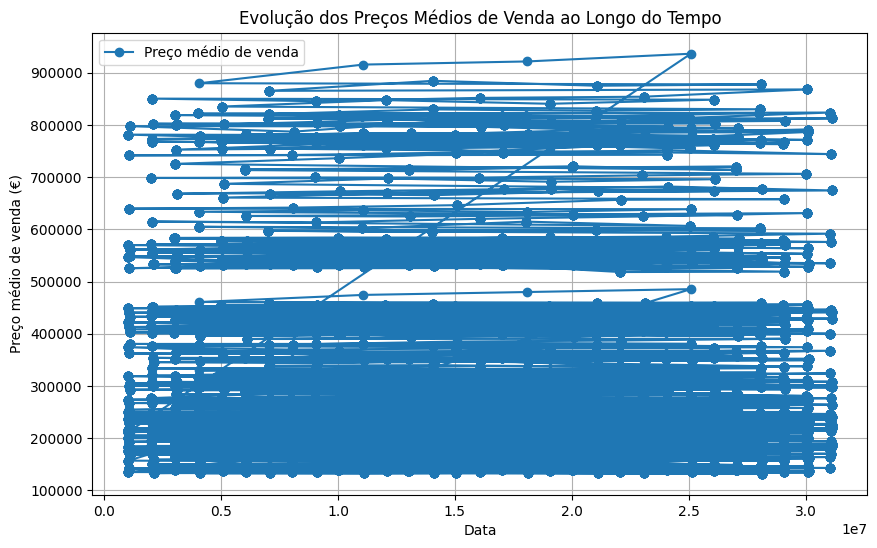

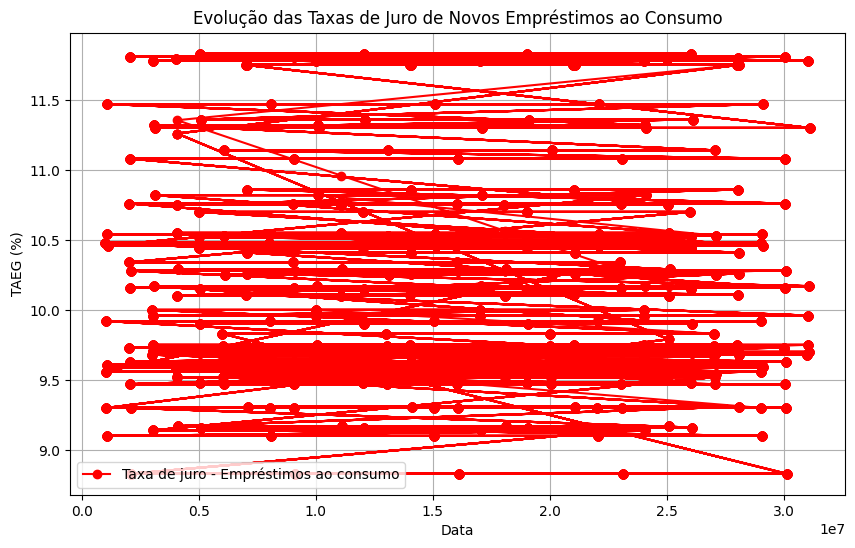

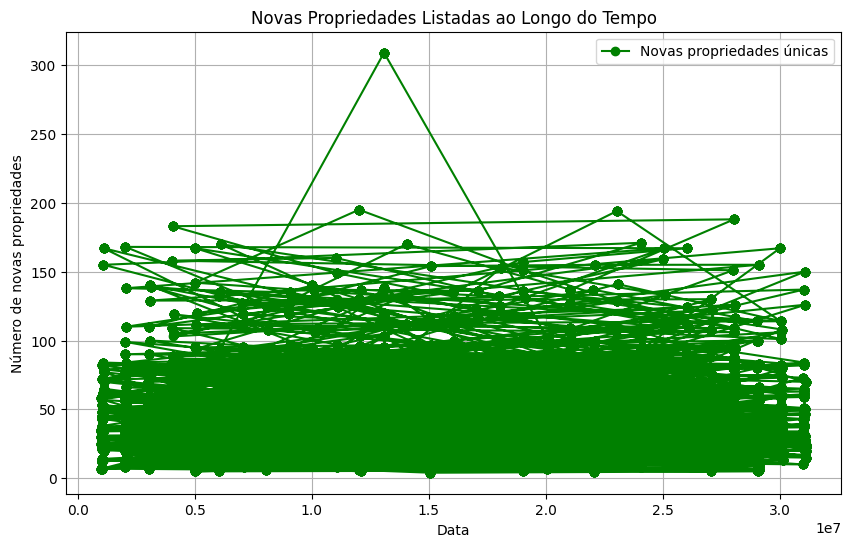

In [5]:
# 1. Evolução dos preços médios de venda
plt.figure(figsize=(10, 6))
plt.plot(df_dados['Data'], df_dados['Preço médio_sell'], label='Preço médio de venda', marker='o')
plt.title('Evolução dos Preços Médios de Venda ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço médio de venda (€)')
plt.grid(True)
plt.legend()
plt.show()

# 2. Evolução das taxas de juro de novos empréstimos ao consumo
plt.figure(figsize=(10, 6))
plt.plot(df_dados['Data'], df_dados['TAEG de novos empréstimos ao consumo'], label='Taxa de juro - Empréstimos ao consumo', marker='o', color='red')
plt.title('Evolução das Taxas de Juro de Novos Empréstimos ao Consumo')
plt.xlabel('Data')
plt.ylabel('TAEG (%)')
plt.grid(True)
plt.legend()
plt.show()

# 3. Análise de novas listagens de propriedades ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(df_dados['Data'], df_dados['Novas propriedades únicas_sell'], label='Novas propriedades únicas', marker='o', color='green')
plt.title('Novas Propriedades Listadas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de novas propriedades')
plt.grid(True)
plt.legend()
plt.show()



In [9]:
df_dados.columns

Index(['Data', 'Preço médio_sell', 'Preço médio por m2_sell',
       'Preço médio de fechamento (BETA)_sell',
       'Preço médio de fechamento por m2 (BETA)_sell', 'Subida de preço_sell',
       'Redução de preço_sell', 'Novas propriedades únicas_sell',
       'Propriedades vendida e retiradas_sell',
       'Novas listagens não desduplicadas_sell', 'codLocation',
       'Preço médio_rent', 'Preço médio por m2_rent',
       'Preço médio de fechamento (BETA)_rent',
       'Preço médio de fechamento por m2 (BETA)_rent', 'Subida de preço_rent',
       'Redução de preço_rent', 'Novas propriedades únicas_rent',
       'Propriedades vendida e retiradas_rent',
       'Novas listagens não desduplicadas_rent', 'Dayi', 'Monthi', 'Yeari',
       'mes', 'ano', '1 mês (Euribor)', '3 meses (Euribor)',
       '6 meses (Euribor)', '12 meses (Euribor)', 'Avaliacoes Total',
       'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
 

In [6]:
cod_location_1711105 = df[df['codLocation'] == 1711105]

# Ordenando por Monthi e Yeari
cod_location_1711105 = cod_location_1711105.sort_values(by=['mes', 'ano'])

# Exibindo o dataset ordenado
cod_location_1711105.columns

Index(['Data', 'Preço médio_sell', 'Preço médio por m2_sell',
       'Preço médio de fechamento (BETA)_sell',
       'Preço médio de fechamento por m2 (BETA)_sell', 'Subida de preço_sell',
       'Redução de preço_sell', 'Novas propriedades únicas_sell',
       'Propriedades vendida e retiradas_sell',
       'Novas listagens não desduplicadas_sell', 'codLocation',
       'Preço médio_rent', 'Preço médio por m2_rent',
       'Preço médio de fechamento (BETA)_rent',
       'Preço médio de fechamento por m2 (BETA)_rent', 'Subida de preço_rent',
       'Redução de preço_rent', 'Novas propriedades únicas_rent',
       'Propriedades vendida e retiradas_rent',
       'Novas listagens não desduplicadas_rent', 'Dayi', 'Monthi', 'Yeari',
       'mes', 'ano', '1 mês (Euribor)', '3 meses (Euribor)',
       '6 meses (Euribor)', '12 meses (Euribor)', 'Avaliacoes Total',
       'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
 

In [7]:
# Criando a coluna de data corretamente
cod_location_1711105['Date'] = pd.to_datetime(cod_location_1711105[['Yeari', 'Monthi', 'Dayi']])

# Verificando se a coluna 'Date' foi criada corretamente
print(cod_location_1711105[['Date', 'Preço médio_sell', 'Preço médio_rent']])

# Plotando gráfico de linhas com dois eixos Y
fig, ax1 = plt.subplots()

ax1.set_xlabel('Data')
ax1.set_ylabel('Preço médio de venda', color='tab:blue')
ax1.plot(cod_location_1711105['Date'], cod_location_1711105['Preço médio_sell'], color='tab:blue', label='Venda')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Preço médio de aluguel', color='tab:orange')
ax2.plot(cod_location_1711105['Date'], cod_location_1711105['Preço médio_rent'], color='tab:orange', label='Aluguel')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Comparação de Preço Médio: Venda vs Aluguel para codLocation 1711105')
fig.tight_layout()
plt.show()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing